<a href="https://colab.research.google.com/github/gasparmamac/DeepLearningNotebook/blob/main/RegressionProblemWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Standard imports

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
block_plot = False

<h1> Convenience Function

In [69]:
def create_linear_data(num_data=100, y_offset=0, slope=1, stddev=0.3):

  # random  manual seed for consistency
  tf.random.set_seed(42)

  # create linear data with a small amount of noise
  X = 10 * tf.random.uniform(shape=[num_data])
  y = y_offset + slope * X + tf.random.normal(stddev=stddev, shape=[num_data])

  X = tf.reshape(X, (len(X), 1))
  y = tf.reshape(y, (len(y), 1))

  return X ,y

In [70]:
def plot_data(x, y, xlim=(0, 10), ylim=(0, 10)):
  plt.figure
  plt.plot(x, y, 'r.') #  'r+' red pluses, 'b.' blue dots, '*-' line graph
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.show(block=block_plot)

<h1> Generate and plot sample data

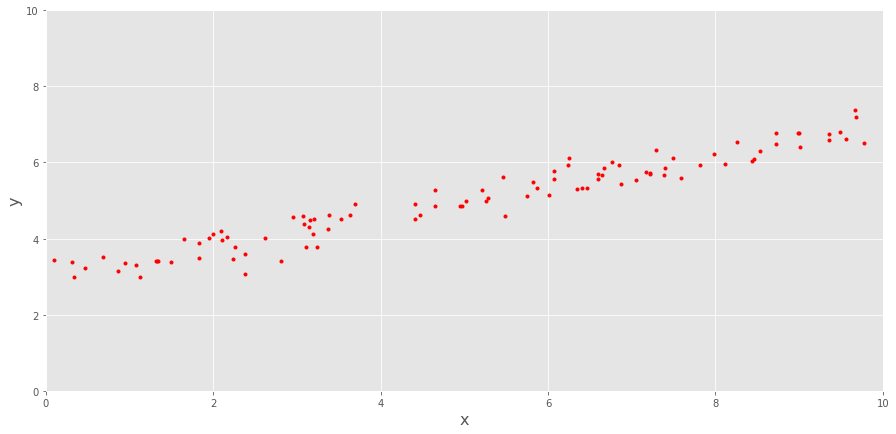

In [71]:
# create some data
y_int = 3
slope = 0.4
X, y = create_linear_data(y_offset=y_int, slope=slope, stddev=0.3)

plot_data(X, y)

<h1> Modeling Linear Neural Network in Keras (Without the BIAS Term; y = mx)

  <h3> Step 1. Build a network model using either Sequential API or the Functional API in Keras

In [72]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation=None, use_bias=False))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


  <h3> Step 2. Compile the Model

In [73]:
model.compile(loss='mse', optimizer='adam')

  <h3> Step 3. Train the model

In [74]:
history = model.fit(X, y, epochs=50, verbose=0)

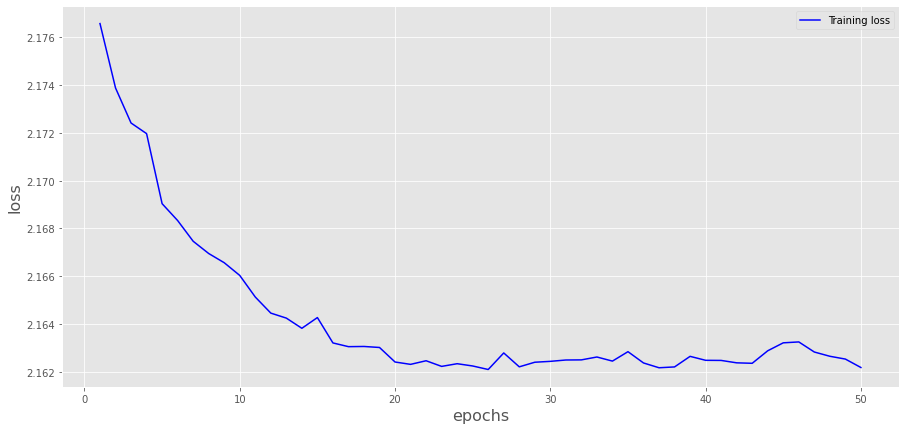

In [75]:
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

  <h3> Step 4. Predict Model Parameters and Display Results

In [76]:
slope = model.layers[0].weights[0]
print('Slope: ', slope[0].numpy())

pred_y = model.predict(X)

Slope:  [0.85557485]
4/4 [==============================] - 0s 3ms/step


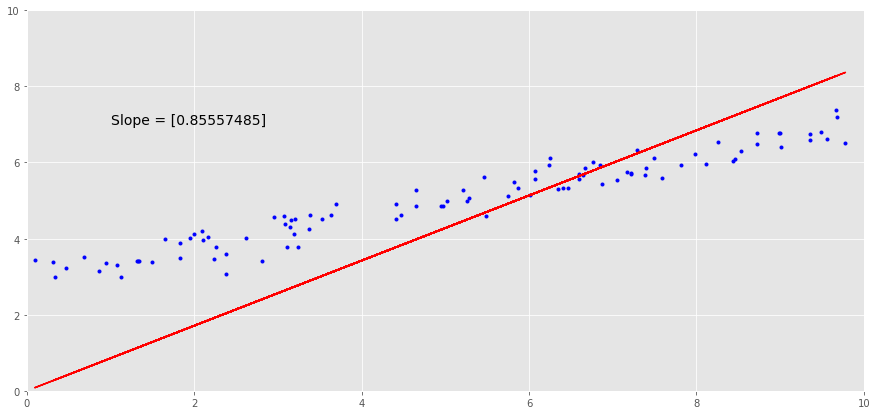

In [77]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'r')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize=14, family='Consolas')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

<h1> Modeling Linear Neural Network in Keras (Now WITH BIAS Term; y = mx + b)

In [78]:
model2 = Sequential() #  instantiate
model2.add(Dense(1, input_shape=(1,), activation=None, use_bias=True)) #  add layer, 1 neuron, activation=None=linear activation
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [79]:
model2.compile(loss='mse', optimizer='adam')

In [80]:
history = model2.fit(X, y, epochs=2000, verbose=0)

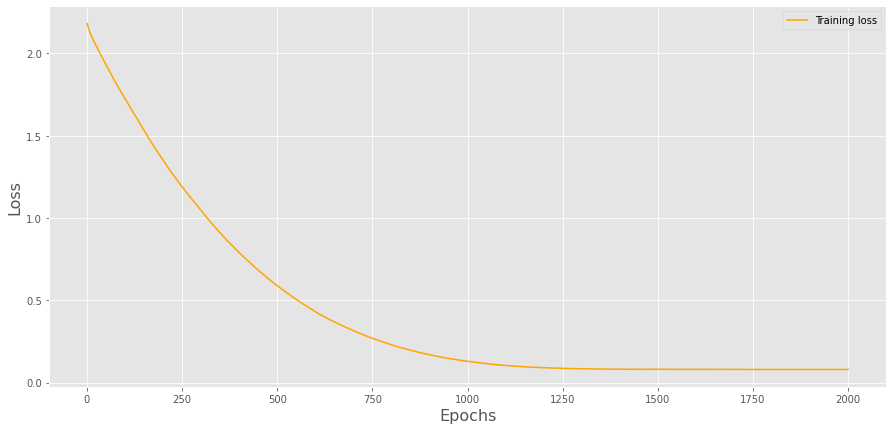

In [81]:
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure
plt.plot(epochs, loss_values, 'Orange', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
m = model2.layers[0].weights[0]
b = model2.layers[0].weights[1]
print('m: ', m[0].numpy())
print('b: ', b.numpy())

pred_y = model2.predict(X)

m:  [0.39806193]
b:  [2.9915583]
4/4 [==============================] - 0s 2ms/step


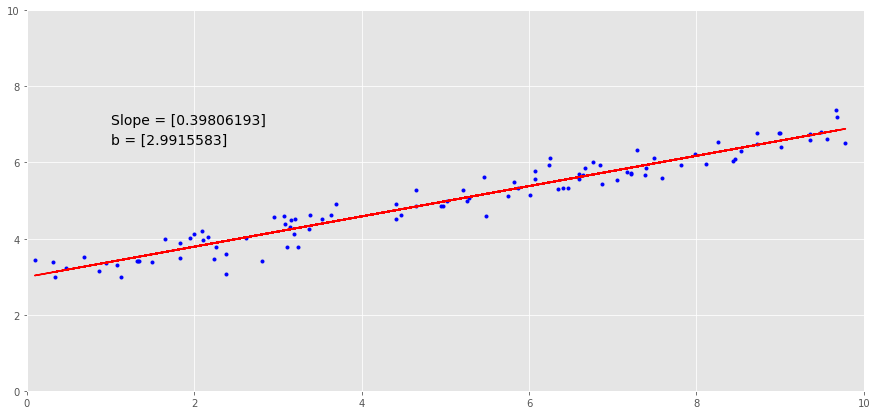

In [83]:
plt.figure
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'r')
plt.text(1, 7.0, 'Slope = ' + str(m[0].numpy()), fontsize=14, family='Consolas')
plt.text(1, 6.5, 'b = ' + str(b.numpy()), fontsize=14, family='Consolas')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

<h1> Fitting Non-Linear Data (but linear in parameters a0, a1, a2) using Keras ( y = a0 + a1xcos(x) + a2X^2 + noise )

In [84]:
def create_nonlinear_data(xmin=-10, xmax=10, num_data=100, theta_0=0, theta_1=0.3, theta_2=0.05, noise=0.1):
  
  tf.random.set_seed(42)
  X = tf.linspace(xmin, xmax, num=num_data)
  y = theta_0 + theta_1 * X *np.cos(X) + theta_2 * X**2 + noise*np.random.normal(size=num_data)

  X = tf.reshape(X, (len(X), 1))
  y = tf.reshape(y, (len(y), 1))

  return X, y

In [85]:
theta_0 = -3
theta_1 = 0.3
theta_2 = 0.05
X, y = create_nonlinear_data(theta_0=theta_0, theta_1=theta_1, theta_2=theta_2, noise=0.3)

# create two features from input data that match the functional form of the data that we generated above
Xf  =tf.concat((X*tf.math.cos(X), X*X), axis=1)
temp = Xf.numpy()
print('Xf contains two features based on X: ', temp.shape)


Xf contains two features based on X:  (100, 2)


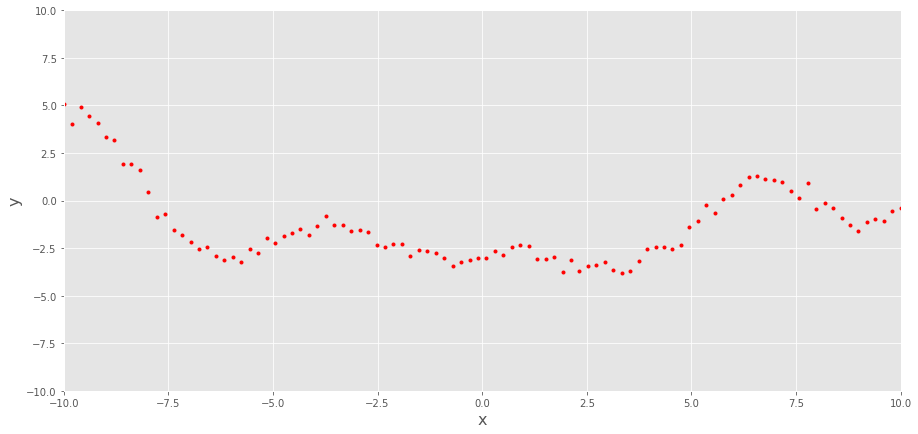

In [86]:
plot_data(X, y, (-10, 10), (-10, 10))

Create Keras Model (the non-linear model)

In [87]:
model3 = Sequential()
model3.add(Dense(1, input_shape=(2,), activation=None, use_bias=True))
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Compile the non-linear Model

In [88]:
model3.compile(loss='mse', optimizer='adam')

Train the non linear Model

In [89]:
history = model3.fit(Xf, y, epochs=2000, verbose=0)

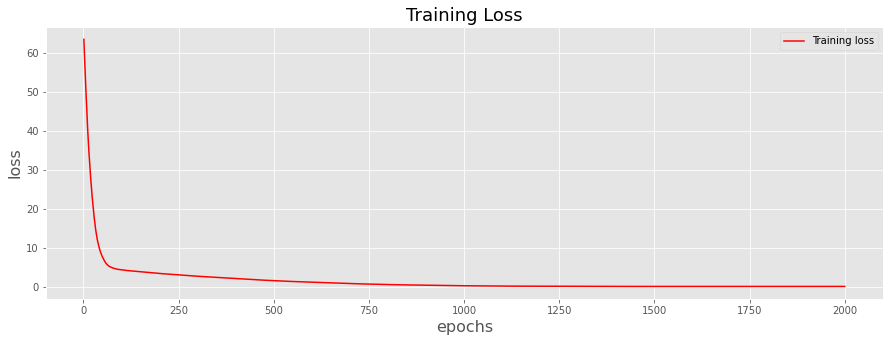

In [90]:
history_dict = history.history
loss_value = history_dict['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_value, 'r', label='Training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')
plt.legend()
plt.show()

Predict Model and Display

In [91]:
pred_theta_0 = model3.layers[0].bias[0].numpy()
temp = model3.layers[0].weights[0].numpy()
pred_theta_1 = temp[0]
pred_theta_2 = temp[1]

print('Actual coefficients: \n')
print('Theta0: ', theta_0)
print('Theta1: ', theta_1)
print('Theta2: ', theta_2)
print('\n')
print('Predicted coefficients: \n')
print('Theta0: ', pred_theta_0)
print('Theta1: ', pred_theta_1[0])
print('Theta2: ', pred_theta_2[0])

pred_y = model3.predict(Xf)


Actual coefficients: 

Theta0:  -3
Theta1:  0.3
Theta2:  0.05


Predicted coefficients: 

Theta0:  -3.0133364
Theta1:  0.30313686
Theta2:  0.05222367
4/4 [==============================] - 0s 3ms/step


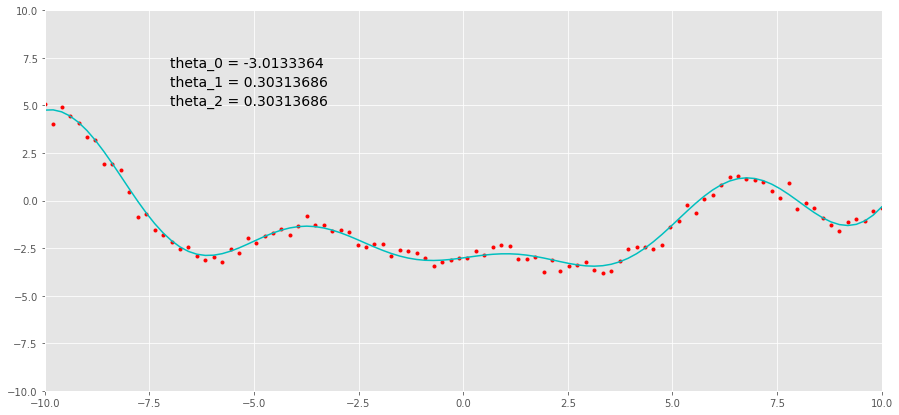

In [92]:
plt.plot(X, y, 'r.')
plt.plot(X, pred_y, 'c-')
plt.text(-7, 7.0, 'theta_0 = ' + str(pred_theta_0), fontsize=14, family='Consolas')
plt.text(-7, 6.0, 'theta_1 = ' + str(pred_theta_1[0]), fontsize=14, family='Consolas')
plt.text(-7, 5.0, 'theta_2 = ' + str(pred_theta_1[0]), fontsize=14, family='Consolas')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()